In [2]:
#Data Pre-processing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('C:/Users/jesus/OneDrive/Documentos/User_Data.csv')  
print(data_set)
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
print(x)
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  

In [3]:
print(x_train, x_test)

### The scaled output for the test set will be:

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [3]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [4]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(x_test)

# Creating the Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:\n", cm)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Confusion Matrix:
 [[66  2]
 [ 8 24]]
Accuracy:  0.9
Precision:  0.9074844074844075
Recall:  0.8602941176470589
F1 Score:  0.878581835842642


C:\Users\jesus\AppData\Local\Temp\ipykernel_6784\2956257430.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


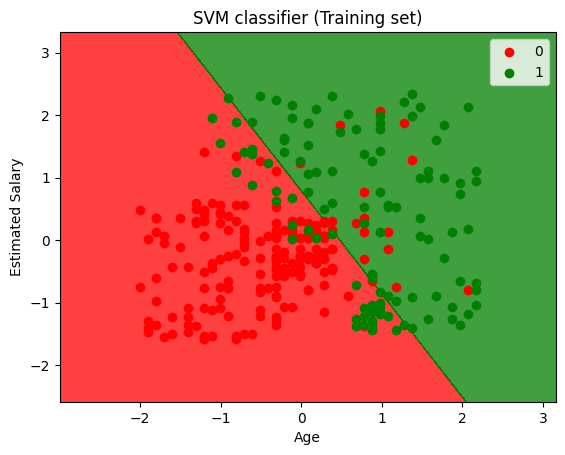

In [5]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

C:\Users\jesus\AppData\Local\Temp\ipykernel_6784\3769300532.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


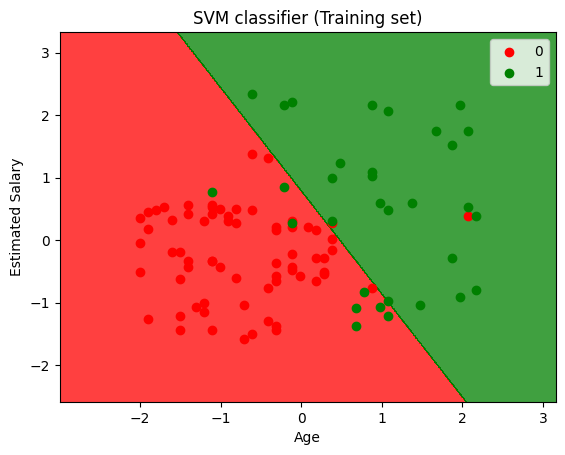

In [6]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In [7]:
 from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Split the dataset into features and target variable
X = cancer.data
y = cancer.target

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a SVM Classifier with a linear kernel
clf = svm.SVC(kernel='linear') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics

# Load data from CSV file
file_path = 'F:/DataUpdated.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = data.drop('RV', axis=1)  # Features
y = data['RV']  # Target variable

# Define KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an SVM Classifier
clf = SVC(kernel='rbf', random_state=42)

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Training the model
    clf.fit(X_train, y_train)
    
    # Training precision for fold
    y_train_pred = clf.predict(X_train)
    train_precision = metrics.precision_score(y_train, y_train_pred, average='weighted')
    print(f"Training Precision for fold {fold}: {train_precision:.4f}")
    
    # Testing precision for fold
    y_pred = clf.predict(X_test)
    test_precision = metrics.precision_score(y_test, y_pred, average='weighted')
    print(f"Testing Precision for fold {fold}: {test_precision:.4f}")
    
    # Testing recall for fold
    test_recall = metrics.recall_score(y_test, y_pred, average='weighted')
    print(f"Testing Recall for fold {fold}: {test_recall:.4f}\n")
    
    fold += 1

KeyError: "['RV'] not found in axis"

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

# Load data from CSV file
file_path = 'C:/Users/jesus/OneDrive/Documentos/ej_svm.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = data.drop('Spam/Not Spam', axis=1)  # Features
y = data['Spam/Not Spam']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with specified parameters
                             
clf = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest (100 trees in this case)
    max_depth=10,          # Maximum depth of each tree (10 levels in this case)
    max_features='sqrt',   # Maximum number of features to consider at each split ('sqrt' means square root of total features)
    min_samples_split=2,   # Minimum number of samples required to split an internal node (2 samples in this case)
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node (1 sample in this case)
    bootstrap=True,        # Whether bootstrap samples are used when building trees (True for Random Forest)
    random_state=42        # Seed for random number generation (for reproducibility)
)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [11]:
#Data Pre-processing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
# Load data from CSV file
file_path = 'C:/Users/jesus/OneDrive/Documentos/ej_svm.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
x = data.drop('Spam/Not Spam', axis=1)  # Features
y = data['Spam/Not Spam']  # Target variable

print(x)
print(y)
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

    Email_ID  AVG_Word_L  N_Uppercase_L  N_exclamation_M
0          1         5.2              3                0
1          2         4.9              1                1
2          3         6.1              5                2
3          4         4.5              2                0
4          5         5.8              4                3
5          6         5.0              2                0
6          7         5.5              3                2
7          8         5.9              1                1
8          9         4.7              4                4
9         10         5.6              2                0
10        11         4.8              3                1
11        12         6.0              1                0
12        13         5.7              4                2
13        14         4.3              2                0
14        15         5.9              5                3
15        16         5.1              1                1
16        17         6.2       

In [12]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(x_test)

# Creating the Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:\n", cm)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Confusion Matrix:
 [[3 0]
 [0 5]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [15]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show() 

ValueError: X has 2 features, but SVC is expecting 4 features as input.